In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from cal_angle import GetClockAngle

In [3]:
PATH1 = 'C:\\Users\\23687\\Desktop\\APMCM\\2021 APMCM Problems\\2021 APMCM Problem A\\Annex 3\\EdgeContour1.xls'
PATH2 = 'C:\\Users\\23687\\Desktop\\APMCM\\2021 APMCM Problems\\2021 APMCM Problem A\\Annex 3\\EdgeContour2.xls'
data = pd.read_excel(PATH1,header=None)

In [4]:
E1_break_mark = np.load('E1_break_mark.npy')
E1_everypoint_ID = np.load('E1_everypoint_ID.npy')
E2_break_mark = np.load('E2_break_mark.npy')
E2_everypoint_ID = np.load('E2_everypoint_ID.npy')

In [5]:
i = 0  #第几段
pointsets = []
targets = []
for i in range(len(E1_break_mark)-1):
   pointsets.append(data[E1_break_mark[i]:E1_break_mark[i+1]].values)
   tmp = np.mean(E1_everypoint_ID[E1_break_mark[i]:E1_break_mark[i+1]])
   if tmp >= 0.5:
      tmp = 1
   else:
      tmp = 0
   targets.append(tmp)
t1 = data[E1_break_mark[-1]:].values
t2 = data[:E1_break_mark[0]].values
tmp = (np.mean(E1_everypoint_ID[E1_break_mark[-1]:]) + np.mean(E1_everypoint_ID[:E1_break_mark[0]]))/2
if tmp >= 0.5:
   tmp = 1
else:
   tmp = 0
pointsets.append(np.concatenate([t1,t2]))
targets.append(tmp)
len(pointsets)


36

In [32]:
flag = 0

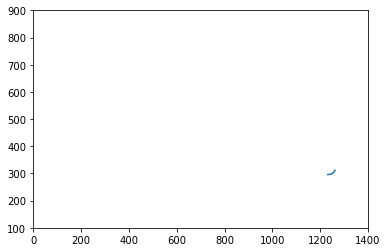

1


In [65]:
x = [i[0] for i in pointsets[flag]]
y = [i[1] for i in pointsets[flag]]
plt.plot(x, y)
plt.xlim((0, 1400))
plt.ylim((100, 900))
plt.show()
print(targets[flag])
flag += 1

In [67]:
x

[1261.531,
 1261.056,
 1260.606,
 1260.298,
 1259.833,
 1259.507,
 1258.996,
 1258.496,
 1258.107,
 1257.615,
 1257.171,
 1256.679,
 1256.19,
 1255.698,
 1255.167,
 1254.677,
 1254.106,
 1253.615,
 1253.013,
 1252.385,
 1251.896,
 1251.2,
 1250.755,
 1250.025,
 1249.266,
 1248.853,
 1248.045,
 1246.857,
 1245.99,
 1245.091,
 1243.908,
 1242.982,
 1242.036,
 1240.888,
 1239.938,
 1238.969,
 1237.987,
 1236.995,
 1235.998,
 1235.0,
 1234.0,
 1233.0,
 1232.0,
 1231.001]

In [8]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [13]:
eng.cd('D:\\PycharmProjects\\APMCM\\Q3',nargout=0)
params = eng.fitellipse(matlab.double(x), matlab.double(y))
params

matlab.double([[103.00340167709564,270.308919776852,23.137021935550532,24.232491069145144,-1.4616839671580997]])

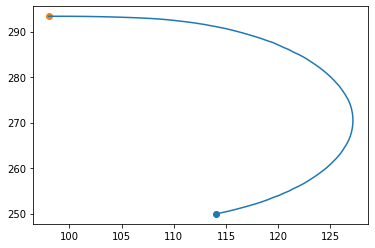

In [14]:
plt.plot(x, y)
plt.scatter(x[0], y[0])
plt.scatter(x[-1], y[-1])
plt.show()

In [257]:
((x[0]-x[-1])**2 + (y[0]-y[-1])**2)**0.5

1015.0271509825587

In [15]:
type_dict = {1:"Ellipse", 0:"Line"}

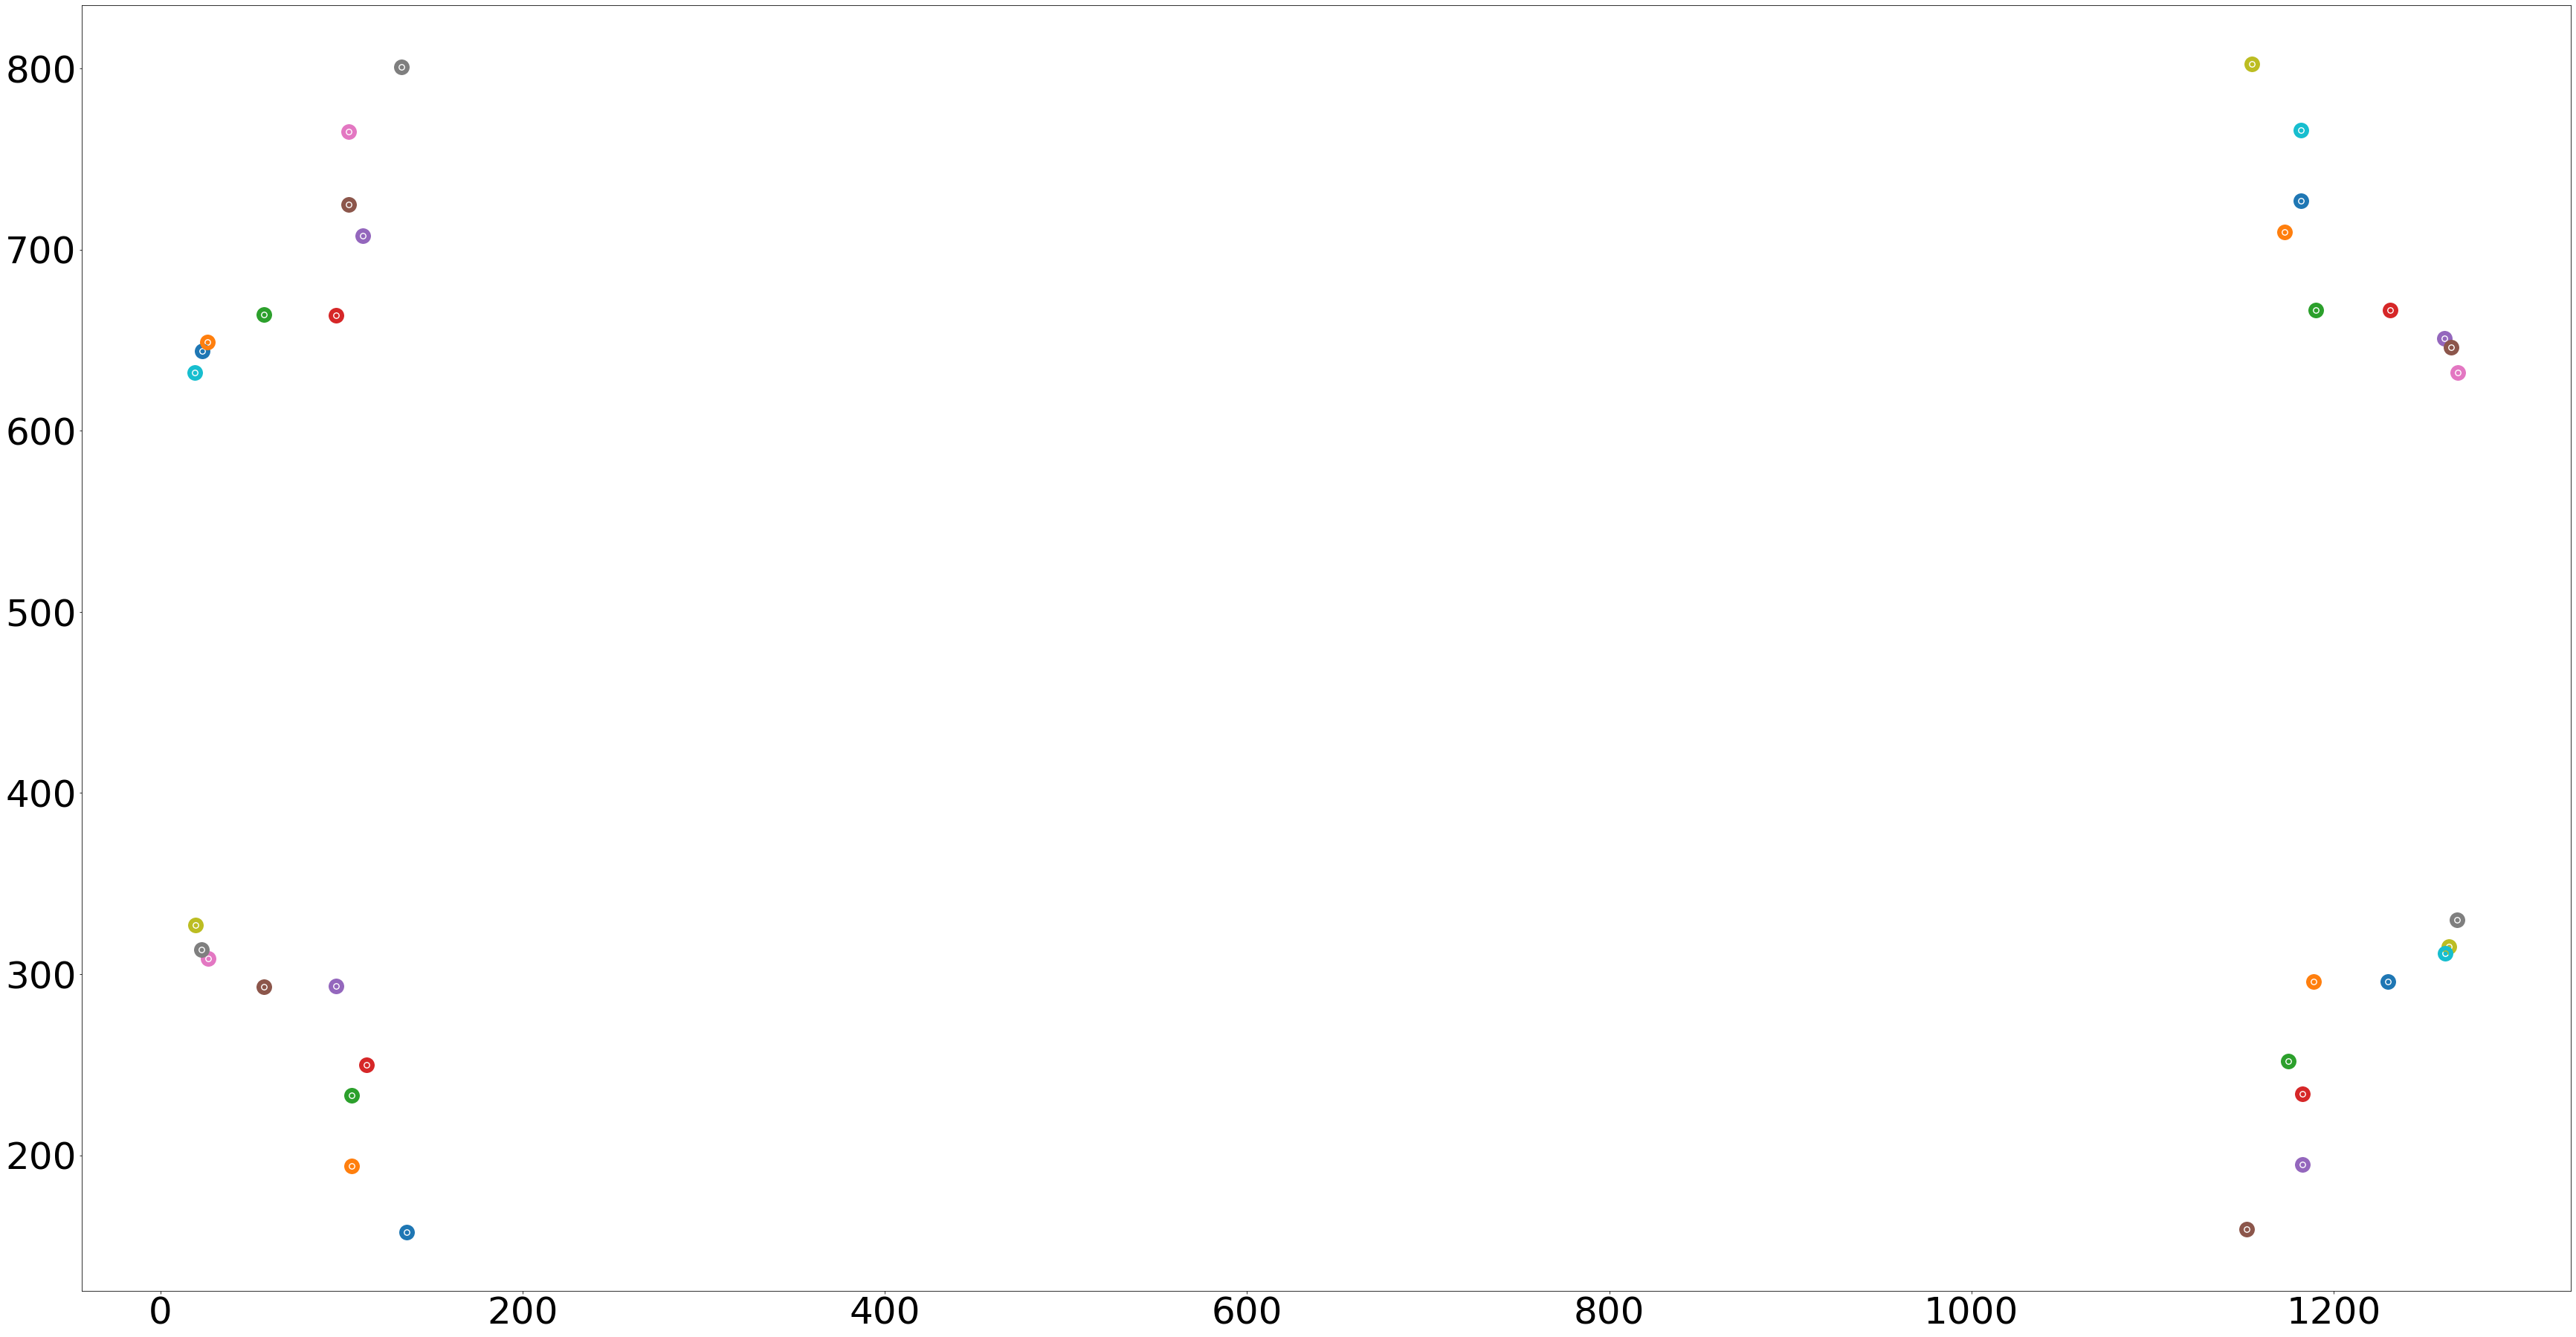

In [6]:
plt.figure(figsize=(12*5,8*5))
plt.tick_params(labelsize=50)
plt.gca().set_aspect('equal', 'box')

for i in range(len(pointsets)):
    # print(f"{type_dict[targets[i]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])}")
    x = [p[0] for p in pointsets[i]]
    y = [p[1] for p in pointsets[i]] 
    # plt.plot(x, y,linewidth=15)
    plt.scatter(x[0], y[0],linewidth=15)
    # plt.scatter(x[-1], y[-1])
plt.savefig(fname="Q3_1_p.png")
plt.show()

In [251]:
for i in range(len(pointsets)):
    if targets[i] == 0:
        x = [p[0] for p in pointsets[i]]
        y = [p[1] for p in pointsets[i]]
        L = ((x[0]-x[-1])**2 + (y[0]-y[-1])**2)**0.5
        print(f"id:{i},{type_dict[targets[i]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])},{int(L)}pixel")
        
    if targets[i] == 1:
        x = [p[0] for p in pointsets[i]]
        y = [p[1] for p in pointsets[i]]
        params = eng.fitellipse(matlab.double(x), matlab.double(y))

        """计算扫描角"""
        start_point = pointsets[i][0]
        center_point = np.array(params[0][:2])
        end_point = pointsets[i][-1]
        v1 = start_point - center_point
        v2 = end_point - center_point
        angel = GetClockAngle(v1, v2)

        print(f"id:{i},{type_dict[targets[i]]},{(params[0][0],params[0][1])},{[params[0][2],params[0][3]]},{tuple(pointsets[i][0])},{tuple(pointsets[i][-1])},{angel}°,{params[0][-1] * 180 /math.pi}°")

id:0,Ellipse,(131.8545567223421, 191.4861550843761),[26.119573851478187, 34.08126320771972],(135.9719, 157.4903),(105.5705, 193.0058),-100.21457747070096°,-7.184613918070393°
id:1,Line,(105.5578, 194.0051),(105.5151, 232.0005),37pixel
id:2,Ellipse,(112.05524660537566, 238.38804118882396),[10.766743983767235, 6.708427566913493],(105.5158, 233.0009),(113.215, 249.5171),-135.43069969851504°,84.18378906608658°
id:3,Ellipse,(103.00340167709564, 270.308919776852),[23.137021935550532, 24.232491069145144],(114.0397, 249.9153),(98.00047, 293.3706),163.81924772859432°,-83.74832230009794°
id:4,Line,(96.99973, 293.3714),(57.99785, 293.2173),39pixel
id:5,Ellipse,(55.72228531229439, 322.57238544434597),[32.29966239055757, 28.82983015718152],(56.99928, 293.2107),(26.88044, 307.9323),-65.57803754908214°,23.90385839669272°
id:6,Ellipse,(24.785744515121905, 310.3140841956458),[0.6390648608130379, 3.6443785017102965],(26.40641, 308.6742),(23.24905, 313.2714),162.79522101492645°,32.009780022106845°
id:7,E